In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

In [3]:
import deepmatcher as dm
from utilities_functions.intermediate_layer_extraction import return_layer_input
from utilities_functions.ri_calculator import computeRi
from utilities_functions.explainer import generateExplanations
import pandas as pd

In [4]:
attributes =['title','manufacturer','price']

## Hybrid

### Dataset creation

In [12]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/amazongoogle_hybrid.pth')

In [6]:
neg_classifier_hybrid,neg_ids_hybrid = return_layer_input('../../Structured/Amazon-Google/'
                                                                         ,'negatives',512,hybrid_model,
                                                                        hybrid_model.classifier,device=-1)

In [13]:
testneg_classifier_hybrid,testneg_ids_hybrid = return_layer_input('../../Structured/Amazon-Google/'
                                                                         ,'test_negatives',128,hybrid_model,
                                                                        hybrid_model.classifier,device=-1)

In [7]:
pos_classifier_hybrid,pos_ids_hybrid = return_layer_input('../../Structured/Amazon-Google/','positives',
                                                          512,hybrid_model,hybrid_model.classifier,device=-1)

In [14]:
testpos_classifier_hybrid,testpos_ids_hybrid = return_layer_input('../../Structured/Amazon-Google/',
                                                                  'test_positives',128,hybrid_model,
                                                                  hybrid_model.classifier,device=-1)

In [15]:
hybrid_model = hybrid_model.cuda()

In [9]:
classifier_len_hybrid = len(pos_classifier_hybrid[0][0])
attribute_len_hybrid = int(classifier_len_hybrid/len(attributes))

### Negatives analysis

In [16]:
negatives_ri_hybrid,neg_ri_norms_hybrid = computeRi(hybrid_model.classifier,
                                                    attributes,testneg_classifier_hybrid,attribute_len_hybrid,1)

100%|██████████| 128/128 [00:06<00:00, 18.95it/s]


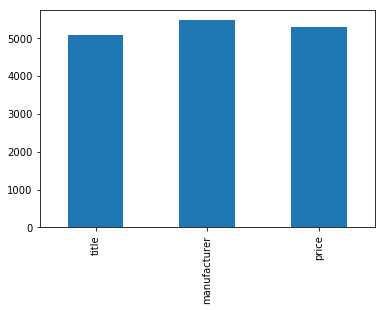

In [18]:
negatives_variation_df = pd.DataFrame(data= neg_ri_norms_hybrid,columns=attributes)
negatives_variation_df.sum().plot.bar()

In [19]:
##save to file
negatives_variation_df.to_csv('experiment_results/testneg_ri_hybrid.csv',index=False)

## Test positives analysis

In [26]:
positives_ri_hybrid,pos_ri_norms_hybrid = computeRi(hybrid_model.classifier,
                                                    attributes,testpos_classifier_hybrid,attribute_len_hybrid,0)

100%|██████████| 128/128 [00:03<00:00, 33.81it/s]


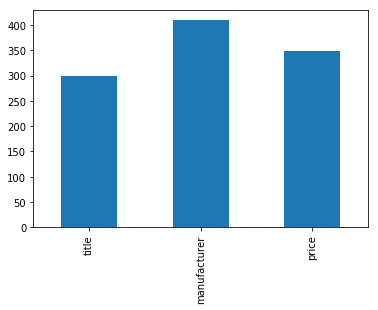

In [27]:
positives_variation_df = pd.DataFrame(data= pos_ri_norms_hybrid,columns=attributes)
positives_variation_df.sum().plot.bar()

In [28]:
##Save results to file
positives_variation_df.to_csv('experiment_results/testpositives_ri_hybrid.csv',index=False)

## Compute nearest neighbours

In [30]:
from utilities_functions.distance_measures import calculate_nearest_neighbors_onAttributes

In [31]:
positives_nn_hybrid = calculate_nearest_neighbors_onAttributes(testpos_classifier_hybrid,testpos_ids_hybrid,
                                                               positives_ri_hybrid,
                                                       neg_classifier_hybrid,neg_ids_hybrid,
                                                               attributes,attribute_len_hybrid)

100%|██████████| 128/128 [00:00<00:00, 194.50it/s]


In [34]:
negatives_nn_hybrid = calculate_nearest_neighbors_onAttributes(testneg_classifier_hybrid,testneg_ids_hybrid,
                                                              negatives_ri_hybrid,pos_classifier_hybrid,
                                                              pos_ids_hybrid,attributes,attribute_len_hybrid)

100%|██████████| 128/128 [00:00<00:00, 631.99it/s]


In [36]:
positives_nn_hybrid.to_csv('experiment_results/testpos_nn_hybrid.csv',index=False)
negatives_nn_hybrid.to_csv('experiment_results/testneg_nn_hybrid.csv',i)

NameError: name 'negatives_nn_' is not defined